<a href="https://colab.research.google.com/github/ykp-cmd/image-processing/blob/main/main_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capy

/content/drive/My Drive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capy


input a number 0-3:3


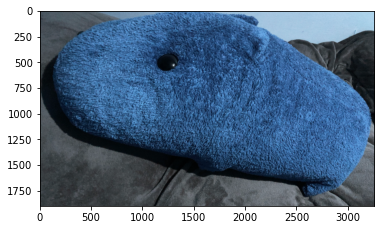

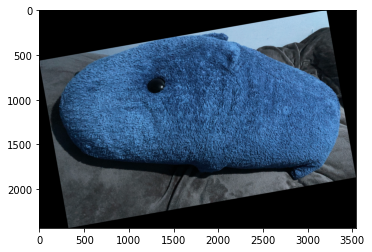

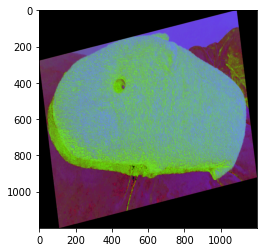

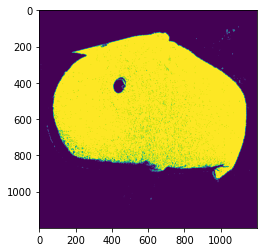

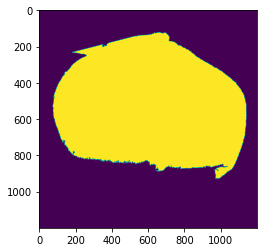

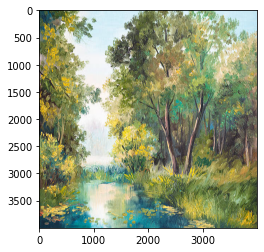

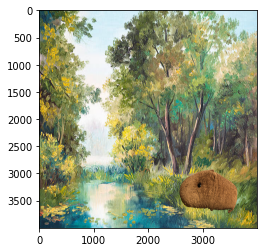

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random

class CapyImSyn:

    def __init__(self, fgImg, bgImg):
        self.fgImg = fgImg
        self.bgImg = bgImg
        self.x = 1500
        self.y = 1500
        self.size = 1000
    
    def setPosition(self, position):
        if (position == 'left'):
            self.x = 500
            self.y = 2800
        elif (position == 'center'):
            self.x = 2000
            self.y = 2000
        elif (position == 'right'):
            self.x = 2500
            self.y = 2800
        elif (position == 'random'):
            self.x = random.choice(range(500, 2500))
            self.y = random.choice(range(500, 2800))

    def setSize(self, size):
        self.size = size
    
    def _createMask(img):
        #convert bgr into hsv
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        plt.imshow(hsv)
        plt.show()

        #binarise
        bin_img = cv2.inRange(hsv, (28, 78, 40), (240, 240, 240))
        plt.imshow(bin_img)
        plt.show()

        #extract contours
        contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        #get the contour with the largest area
        contour = max(contours, key=lambda x: cv2.contourArea(x))
        mask = np.zeros_like(bin_img)
        maskImg =  cv2.drawContours(mask, [contour], -1, color=255, thickness=-1)
        plt.imshow(maskImg)
        plt.show()
        return maskImg

    def _imageRotate(img):
        h, w = img.shape[:2]
        size = (w, h)
        
        #set rotation angle
        angle = 10
        angle_rad = angle/180.0*np.pi
        
        #calculate image size after rotation
        w_rot = int(np.round(h*np.absolute(np.sin(angle_rad))+w*np.absolute(np.cos(angle_rad))))
        h_rot = int(np.round(h*np.absolute(np.cos(angle_rad))+w*np.absolute(np.sin(angle_rad))))
        size_rot = (w_rot, h_rot)
        
        #rotate around the centre of the original image
        center = (w/2, h/2)
        scale = 1.0
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        
        #add a parallel shift(rotation + translation)
        affine_matrix = rotation_matrix.copy()
        affine_matrix[0][2] = affine_matrix[0][2] -w/2 + w_rot/2
        affine_matrix[1][2] = affine_matrix[1][2] -h/2 + h_rot/2

        img = cv2.warpAffine(img, affine_matrix, size_rot, flags=cv2.INTER_CUBIC)
        plt.imshow(img)
        plt.show()
        return img

    def combine(self):
        #randomly select fgImg 
        loadedFgImg = cv2.imread(self.fgImg)
        plt.imshow(loadedFgImg)
        plt.show()
        rot_FgImg = CapyImSyn._imageRotate(loadedFgImg)
        cvt_FgImg = cv2.cvtColor(rot_FgImg, cv2.COLOR_BGR2RGB)
        rs1 = cv2.resize(cvt_FgImg, (self.size, self.size))

        mask = CapyImSyn._createMask(rs1)

        #process in the same way as fgImg
        loadedBgImg = cv2.imread(self.bgImg)
        loadedBgImg_cvt = cv2.cvtColor(loadedBgImg, cv2.COLOR_BGR2RGB)
        rs2 = cv2.resize(loadedBgImg_cvt, (4000, 4000))
        plt.imshow(rs2)
        plt.show()
        
        #set the position for pasting
        x = self.x
        y = self.y

        #width and height take the common part of the foreground and background images
        w = min(rs1.shape[1], rs2.shape[1] - x)
        h = min(rs1.shape[0], rs2.shape[0] - y)

        #area to be merged
        fg_roi = rs1[:h, :w] 
        bg_roi = rs2[y : y + h, x : x + w] 

        #last process 
        bg_roi[:] = np.where(mask[:h, :w, np.newaxis] == 0, bg_roi, fg_roi)
        plt.imshow(rs2)
        plt.show()

fgImgs = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/fgcapy/*.jpg'))
bgImgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/bgcapy/*.jpg')
#randomly select fgImg
fgImg = random.choice(fgImgs)
#interactively select bgImg
flen = len(bgImgs)
n = int(input(f"input a number 0-{flen-1}:"))
if n <= flen:
    #set images and generate instances
    bgImg = bgImgs[n]
    capy = CapyImSyn(fgImg,bgImg)
    capy.setPosition('right')
    capy.setSize(1200)
    capy.combine()
else:
    print("No files exist. Try again.")




In [35]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

class CapyImSyn:

    def __init__(self, fgImg, bgImg):
        self.fgImg = fgImg
        self.bgImg = bgImg
        self.x = 1500
        self.y = 1500
        self.size = 1000
    
    def setPosition(self, position):
        if (position == 'left'):
            self.x = 500
            self.y = 2800
        elif (position == 'center'):
            self.x = 2000
            self.y = 2000
        elif (position == 'right'):
            self.x = 2500
            self.y = 2800
        elif (position == 'random'):
            self.x = random.choice(range(500, 2500))
            self.y = random.choice(range(500, 2800))

    def setSize(self, size):
        self.size = size
    
    def fg_prepro(self, fgImg):   
        original_image = random.choice(fg_imgs)
        original_image_fg = cv2.imread(original_image)
        plt.imshow(original_image_fg)
        plt.show()

        h, w = original_image_fg.shape[:2]
        size = (w, h)

        #set rotation angle
        angle = 10
        angle_rad = angle/180.0*np.pi

        #calculate image size after rotation
        w_rot = int(np.round(h*np.absolute(np.sin(angle_rad))+w*np.absolute(np.cos(angle_rad))))
        h_rot = int(np.round(h*np.absolute(np.cos(angle_rad))+w*np.absolute(np.sin(angle_rad))))
        size_rot = (w_rot, h_rot)

        #rotate around the centre of the original image
        center = (w/2, h/2)
        scale = 1.0
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

        #add a parallel shift(rotation + translation)
        affine_matrix = rotation_matrix.copy()
        affine_matrix[0][2] = affine_matrix[0][2] -w/2 + w_rot/2
        affine_matrix[1][2] = affine_matrix[1][2] -h/2 + h_rot/2

        rotated_original_image = cv2.warpAffine(original_image_fg, affine_matrix, size_rot, flags=cv2.INTER_CUBIC)

        fg_img = cv2.cvtColor(rotated_original_image, cv2.COLOR_BGR2RGB) #convert BGR into RGB
        rs1 = cv2.resize(fg_img, (1500, 1000)) 
        plt.imshow(rs1)
        plt.show()

        hsv = cv2.cvtColor(rs1, cv2.COLOR_BGR2HSV)

        #binarise
        bin_img = cv2.inRange(hsv, (28, 78, 40), (240, 240, 240))
        plt.imshow(bin_img)
        plt.show()

        #extract contours, get the contourarea with more than 101, create the mask
        contours, _= cv2.findContours(bin_img, cv2.FETR_LIST, cv2.CHAIN_APPROX_NONE)
        bin_img.fill(255)
        for cnt in contours:
            if cv2.contourArea(cnt) > 100:
                cv2.drawContours(bin_img, [cnt], -1, 0, -1)
        mask = np.zeros_like(bin_img)
        plt.imshow(mask)
        plt.show()
       
        #contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #get the contour with the largest area
        #contour = max(contours, key=lambda x: cv2.contourArea(x))
        #cv2.drawContours(mask, [contour], -1, color=255, thickness=-1)
        
    def bg_prepro(self,bgImg,n):
        flen=len(bgImg)
        n=int(input(f"input a number 0-{flen}:"))
        if n <= flen:
            #process in the same way as fgImg
            loadedBgImg = cv2.imread(bgImg[n])
            loadedBgImg_cvt = cv2.cvtColor(loadedBgImg, cv2.COLOR_BGR2RGB)
            rs2 = cv2.resize(loadedBgImg_cvt, (4000, 4000))
            plt.imshow(rs2)
            plt.show()
        else:
            print("No files exist. Try again.")

    def combine(self):
        #set the position for pasting
        x = self.x
        y = self.y

        #width and height take the common part of the foreground and background images
        w = min(rs1.shape[1], rs2.shape[1] - x)
        h = min(rs1.shape[0], rs2.shape[0] - y)

        #area to be merged
        fg_roi = rs1[:h, :w] 
        bg_roi = rs2[y : y + h, x : x + w] 

        #last process 
        bg_roi[:] = np.where(mask[:h, :w, np.newaxis] == 0, bg_roi, fg_roi)
        plt.imshow(rs2)
        plt.show()
        
fg_imgs = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/fgcapy/*.jpg'))
bgImg = glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/bgcapy/*.jpg')

capy = CapyImSyn(fg_imgs, bgImg) #set images and generate instances
capy.setPosition('right')
capy.setSize(1200)
capy.combine()

NameError: ignored

In [ ]:

n=int(input("input a number 1to4:"))
def bg_prepro():

    bgImg = '/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/bgcapy'
    file_num=sum(os.path.isfile(os.path.join(bgImg, name)) for name in os.listdir(bgImg))

    if n<=file_num and n!=0:
    #process in the same way as fgImg
    loadedBgImg = cv2.imread(bgImg)
    plt.imshow(loadedBgImg)
    plt.show()
    loadedBgImg = cv2.cvtColor(loadedBgImg, cv2.COLOR_BGR2RGB)
    rs2 = cv2.resize(loadedBgImg, (4000, 4000))

    #set the position for pasting
    x = random.choice(range(1000, 2500))
    y = random.choice(range(1000, 3000))

    #width and height take the common part of the foreground and background images
    w = min(rs1.shape[1], rs2.shape[1] - x)
    h = min(rs1.shape[0], rs2.shape[0] - y)

    #an aria where you'd synthesize
    fg_roi = rs1[:h, :w]
    bg_roi = rs2[y : y + h, x : x + w]

    #synthesise what is produced in the last two processes.
    bg_roi[:] = np.where(mask[:h, :w, np.newaxis] == 0, bg_roi, fg_roi)
    else:
        print("No files exist. Try again.")

input a number 1to4:2
OK


input a number 0-4:3


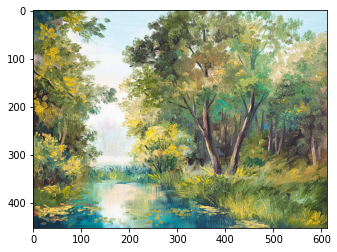

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

def bg_prepro():
    flen=len(bgImg)
    if n <= flen:
            #process in the same way as fgImg
            loadedBgImg = cv2.imread(bgImg[n])
            loadedBgImg_cvt = cv2.cvtColor(loadedBgImg, cv2.COLOR_BGR2RGB)
            plt.imshow(loadedBgImg_cvt)
            plt.show()
    else:
        print("No files exist. Try again.")

            rs2 = cv2.resize(loadedBgImg_cvt, (4000, 4000))

            #set the position for pasting
            x = random.choice(range(1000, 2500))
            y = random.choice(range(1000, 3000))

            #width and height take the common part of the foreground and background images
            w = min(rs1.shape[1], rs2.shape[1] - x)
            h = min(rs1.shape[0], rs2.shape[0] - y)

bgImg = glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/bgcapy/*.jpg')
n=int(input(f"input a number 0-{flen}:"))
  

In [ ]:
def syn_bf():
    #an aria where you'd synthesize
    fg_roi = rs1[:h, :w]
    bg_roi = rs2[y : y + h, x : x + w]

    #synthesise what has produced in the last two processes.
    bg_roi[:] = np.where(mask[:h, :w, np.newaxis] == 0, bg_roi, fg_roi)

In [ ]:
#read facade image
  fgImgs = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/fgcapy/*.jpg'), key=os.path.getsize)
  #read background image
  bgImgs = sorted(glob.glob('/content/drive/MyDrive/Colab Notebooks/CycleGAN_Project/pytorch-CycleGAN-and-pix2pix/datasets/capycopied/bgcapy/*.jpg'), key=os.path.getsize)

  fgImg = random.choice(fgImgs) #pick an image up randomly
  loadedFgImg = cv2.imread(fgImg)
  plt.imshow(loadedFgImg)
  plt.show()
  loadedFgImg = imageRotate(loadedFgImg)
  loadedFgImg = cv2.cvtColor(loadedFgImg, cv2.COLOR_BGR2RGB) #convert BGR into RGB

  #resize image at random
  size = random.choice(range(1000, 3000))
  rs1 = cv2.resize(loadedFgImg, (size, size))

  mask = createMask(rs1)

  #process in the same way as fgImg
  bgImg = random.choice(bgImgs) 
  loadedBgImg = cv2.imread(bgImg)
  loadedBgImg = cv2.cvtColor(loadedBgImg, cv2.COLOR_BGR2RGB)
  rs2 = cv2.resize(loadedBgImg, (4000, 4000))

  #set the position for pasting
  x = random.choice(range(1000, 2500))
  y = random.choice(range(1000, 3000))

  #width and height take the common part of the foreground and background images
  w = min(rs1.shape[1], rs2.shape[1] - x)
  h = min(rs1.shape[0], rs2.shape[0] - y)

  #an aria where you'd synthesize
  fg_roi = rs1[:h, :w]
  bg_roi = rs2[y : y + h, x : x + w]

  #synthesise what is produced in the last two processes.
  bg_roi[:] = np.where(mask[:h, :w, np.newaxis] == 0, bg_roi, fg_roi)